In [3]:
%pip install matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install fireflyalgorithm

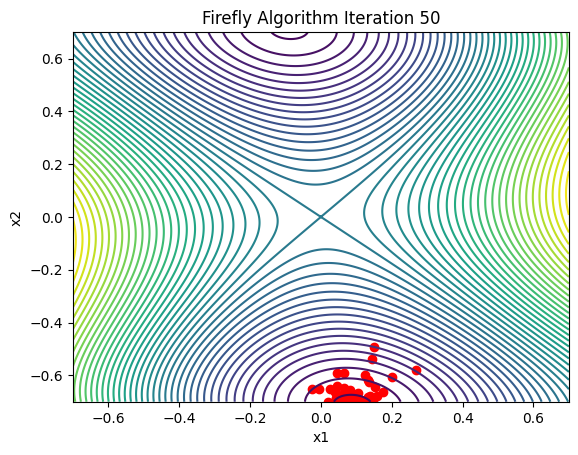

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Fungsi F16
def f16(x1, x2):
    return (4 - 2.1 * x1 ** 2 + (x1 ** 4) / 3) * x1 ** 2 + x1 * x2 + (-4 + 4 * x2 ** 2) * x2 ** 2

# Parameter Firefly Algorithm
n = 50  # Jumlah kunang-kunang
max_iter = 50 # Jumlah iterasi
alpha = 0.1  # Randomness strength
gamma = 0.5  # Light absorption coefficient
beta0 = 0.1  # Attraction coefficient base value

# Inisialisasi populasi
np.random.seed(42)
pop = np.random.uniform(-0.7, 0.7, (n, 2))
intensitas = f16(pop[:, 0], pop[:, 1])

# Simpan data untuk animasi
history = []

# Firefly Algorithm
for t in range(max_iter):
    history.append(pop.copy())
    for i in range(n):
        for j in range(n):
            if intensitas[i] > intensitas[j]:
                r = np.linalg.norm(pop[i] - pop[j])
                beta = beta0 * np.exp(-gamma * r**2)
                pop[i] = pop[i] + beta * (pop[j] - pop[i]) + alpha * (np.random.rand(2) - 0.5)
                pop[i] = np.clip(pop[i], -0.7, 0.7)
                intensitas[i] = f16(pop[i, 0], pop[i, 1])

history.append(pop.copy())

# Plot hasil dan animasi
X1 = np.linspace(-0.7, 0.7, 400)
X2 = np.linspace(-0.7, 0.7, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = f16(X1, X2)

fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter(pop[:, 0], pop[:, 1], c='red')

def update(frame):
    ax.clear()
    ax.contour(X1, X2, Z, levels=50)
    ax.scatter(history[frame][:, 0], history[frame][:, 1], c='red')
    ax.set_title('Firefly Algorithm Iteration {}'.format(frame))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

ani = FuncAnimation(fig, update, frames=len(history), repeat=False)

# Simpan animasi sebagai GIF
writer = PillowWriter(fps=5)
ani.save("firefly_algorithm_2.gif", writer=writer)

plt.show()
